<a href="https://colab.research.google.com/github/uzdanska/Machine-Learning/blob/main/supervised/02_regression/03_linear_regression_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn

Strona biblioteki: https://scikit-learn.org

Dokumentacja/User Guide: https://scikit-learn.org/stable/user_guide.html

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn

```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```

### Preprocessing danych:


1.   [Import bibliorek](#0)
2.   [Wygenerowanie danych](#1)
3.   [Regresja Liniowa przy użyciu scikit-learn](#2)
4.   [Wizualizacja graficzna modelu](#3)
5.   [Współczynnik $R^2$](#4)
6.   [Końcowa postać modelu](#5)
7.   [Regresja z podziałem na zbiór treningowy i testowy](#6)
8.   [Regresja liniowa - zbiór treningowy wizualizacja](#7)
9.   [Regresja liniowa - zbiór testowy wizualizacja](#8)
10.  [Predykcja na podstawie modelu](#9)

### <a name="0"></a> 1. Import bibliotek

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Ustawienia ziarna losowego

In [3]:
np.random.seed(42)

Ustawienie dotyczące wyswietlenia danych numerycznych w bibliotece numpy:

* **precision (dokładność)**: Określa liczbę miejsc po przecinku, która będzie wyświetlana dla liczb zmiennoprzecinkowych,

* **suppress (tłumienie notacji naukowej)**: Parametr ten, gdy jest ustawiony na True, powoduje, że liczby zmiennoprzecinkowe są wyświetlane bez notacji naukowej, nawet jeśli są bardzo małe lub bardzo duże,

* **edgeitems (elementy krawędziowe)**: Określa maksymalną liczbę elementów, które będą wyświetlane na krawędziach tablicy, gdy zostanie ona wypisana,

* **linewidth (szerokość linii)**: Określa maksymalną szerokość linii tekstu, która ma być używana do wyświetlania tablic. Jeśli tablica jest dłuższa niż ta szerokość, zostanie przeniesiona do następnej linii.

* **formatter (formater)**: Jest to słownik, który pozwala dostosować sposób formatowania różnych typów danych. W podanym przypadku (formatter=dict(float=lambda x: f'{x:.2f}')), definiuje formater dla danych typu float. Wartość lambda x: f'{x:.2f}' oznacza, że liczby zmiennoprzecinkowe (float) będą formatowane tak, że będą miały dwie cyfry po przecinku.*

In [4]:
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter = dict(float=lambda x: f'{x:.2f}'))

Ustawienie rozmiaru czcionki na wykresach

In [5]:
sns.set(font_scale = 1.3)

Wyświetlenie wersji sklearn

In [6]:
sklearn.__version__

'1.2.2'

### <a name="1"></a> 2. Wygenerowanie danych


Użycie metodu **make_regression** w sklearn.datasets do wygenerowania dane do modelu regresyjnych.

Oto opis poszczególnych parametrów tej funkcji:

* **n_samples**: Określa liczbę próbek (obserwacji), które zostaną wygenerowane. Domyślnie ustawiona na 100.

* **n_features**: Określa liczbę cech (zmiennych niezależnych), które zostaną wygenerowane dla każdej próbki. Domyślnie ustawiona na 1.

* **n_targets**: Określa liczbę zmiennych zależnych (wartości docelowych), które zostaną wygenerowane dla każdej próbki. Domyślnie ustawiona na 1.

* **noise**: Określa poziom szumu dodawanego do danych. Szum jest wartością losową dodawaną do wartości docelowych, co sprawia, że dane są bardziej realistyczne. Im większa wartość tego parametru, tym większy jest poziom szumu w danych.

* **random_state**: Określa ziarno losowości, które kontroluje powtarzalność wyników. Jeśli ustawiony na konkretną liczbę całkowitą (np. 42), wyniki generowane przez funkcję będą takie same za każdym razem, gdy kod zostanie uruchomiony ze stałym ziarnem losowości.

In [7]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples = 100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


Wyświetlenie 5 pierwszych wierszy zmiennej opisującej:

In [8]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

Wyświetlenie 5 pierwszych wierszy zmiennych docelowych:

In [9]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

Wizualizacja

[]

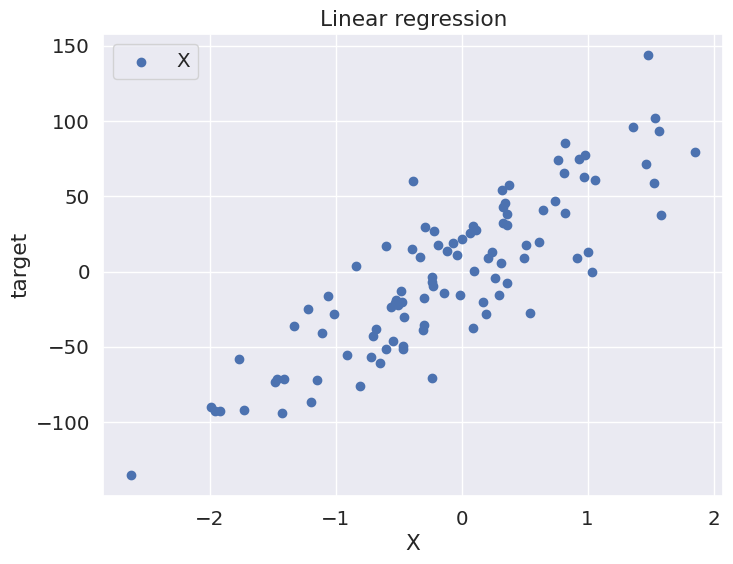

In [15]:
plt.figure(figsize=(8, 6))
plt.title("Linear regression")
plt.xlabel('X')
plt.ylabel('target')
plt.scatter(data, target, label="X")
plt.legend()
plt.plot()

### <a name="2"></a> 3. Regresja Liniowa przy użyciu scikit-learn

$$ Y = w_0 + w_1X_1 $$


In [21]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression()

Sprawdzenie jak dobrze model zostać dopasowany, domyślnie jest tu wskaźnik $R^2$ score

In [18]:
regressor.score(data, target)

0.7426670084336404

Im wynik bliżej jedynki tym lepiej model jest dopasowany

Dokonanie predykcji na podstawie modelu

In [19]:
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

### <a name="3"></a> 4. Wizualizacja graficzna modelu


[]

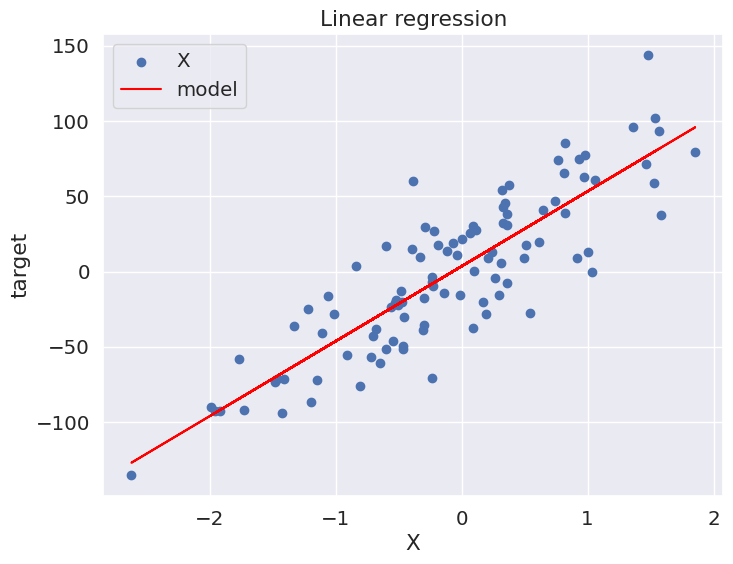

In [23]:
plt.figure(figsize=(8, 6))
plt.title("Linear regression")
plt.xlabel('X')
plt.ylabel('target')
plt.scatter(data, target, label="X")
plt.plot(data, y_pred, color="red", label="model")
plt.legend()
plt.plot()

### <a name="4"></a> 5. Współczynnik $R^2$

Współczynnik $R^2$ jest zdefiniowany jako $1-\frac{u}{y}$ gdzie $u$ jest określone wzorem:

`((y_true - y_pred) ** 2).sum()`

gdzie $v$ jako

`((y_true - y_true.mean()) ** 2).sum()`


Czyli

` 1 - (((y_true - y_pred) ** 2).sum()/((y_true - y_true.mean()) ** 2).sum())`


Najlepszą możliwą wartością jest 1.0. $R^2$
 może przyjmować wartość ujemną. Model, który przewiduje zawsze dla każdej próbki wartość oczekiwaną zmiennej docelowej ma współczynnik $R^2$
 równy 0.

In [24]:
# WSPÓŁCZYNNIK R^2
regressor.score(data, target)

0.7426670084336404

Dotarcie do wag i współćzynnik, wyświelenie liste dostępny atrybutó i metod na obiekcie regressor:

In [25]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

Policzone współczynniki

In [28]:
regressor.coef_

array([49.83])

Punkt przecięcia z osią Y

In [29]:
regressor.intercept_

3.4953459615809184

### <a name="5"></a> 6. Końcowa postać modelu

$$ Y = w_0 + w_1X_1$$

Postać modelu:

$$ Y = 3.495 + 49.83 X_1$$

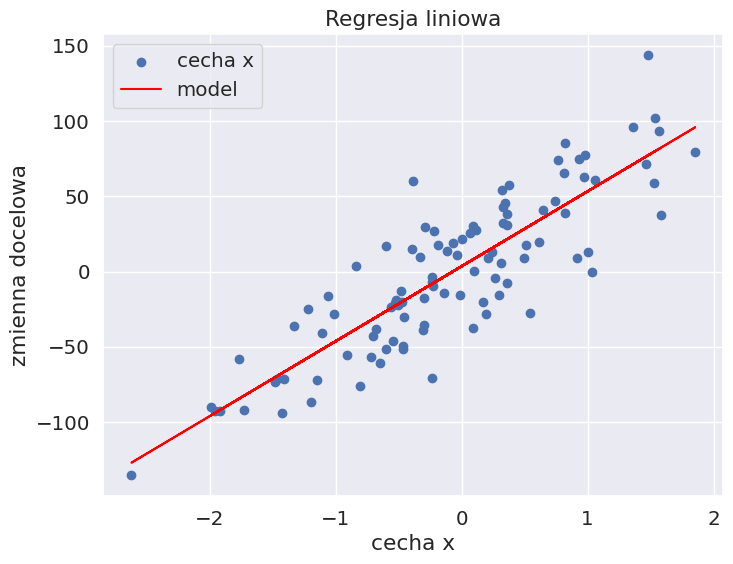

In [30]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

### <a name="6"></a> 7. Regresja z podziałem na zbiór treningowy i testowy


In [32]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


Podział na treningowe i testowe w stosunku 0.65 i 0,25

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


Wizualizacja

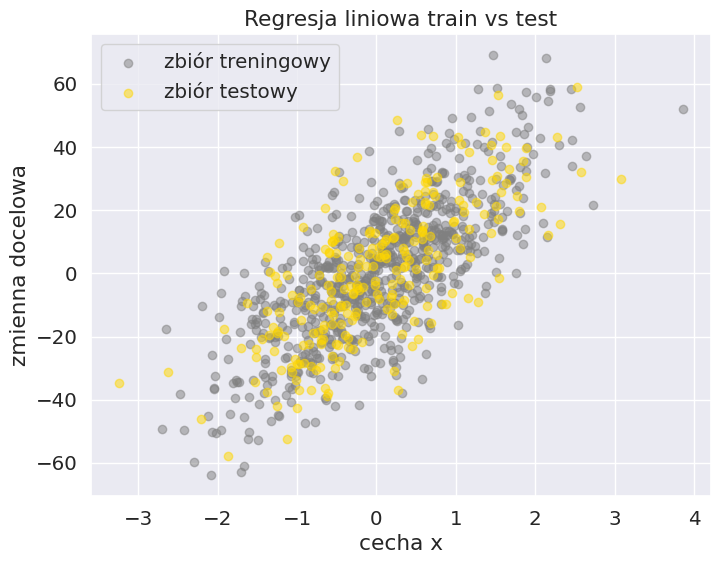

In [35]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label="zbiór treningowy", color="gray", alpha=0.5)
plt.scatter(X_test, y_test, label="zbiór testowy", color="gold", alpha=0.5)
plt.legend()
plt.show()

Instacja modelu zmiennej liniowe


!!!! Ważne aby robić na danych treningowych !!!!!

In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Wskaźnik $R^2$ - czyli ocena dopasowania modelu

In [43]:
regressor.score(X_train, y_train)

print('Dopasowanie do modelu na poziomie ',round(regressor.score(X_train, y_train) * 100, 2), "%")

Dopasowanie do modelu na poziomie  55.5 %


Wskaźnik $R^2$ na danych testowych

In [44]:
regressor.score(X_test, y_test)

print('Dopasowanie do modelu na poziomie ',round(regressor.score(X_test, y_test) * 100, 2), "%")

Dopasowanie do modelu na poziomie  51.08 %


### <a name="7"></a> 8. Regresja liniowa - zbiór treningowy wizualizacja


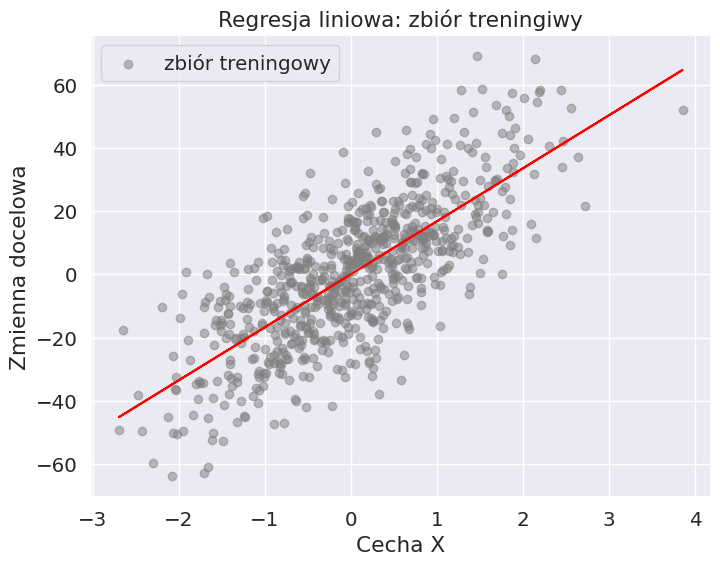

In [46]:
plt.figure(figsize=(8, 6))
plt.title("Regresja liniowa: zbiór treningiwy")
plt.xlabel('Cecha X')
plt.ylabel('Zmienna docelowa')
plt.scatter(X_train, y_train, label="zbiór treningowy", color="gray", alpha=0.5)
# wizualizacja modelu niżej
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0]*X_train, color="red")
plt.legend()
plt.show()

### <a name="8"></a> 9. Regresja liniowa - zbiór testowy wizualizacja


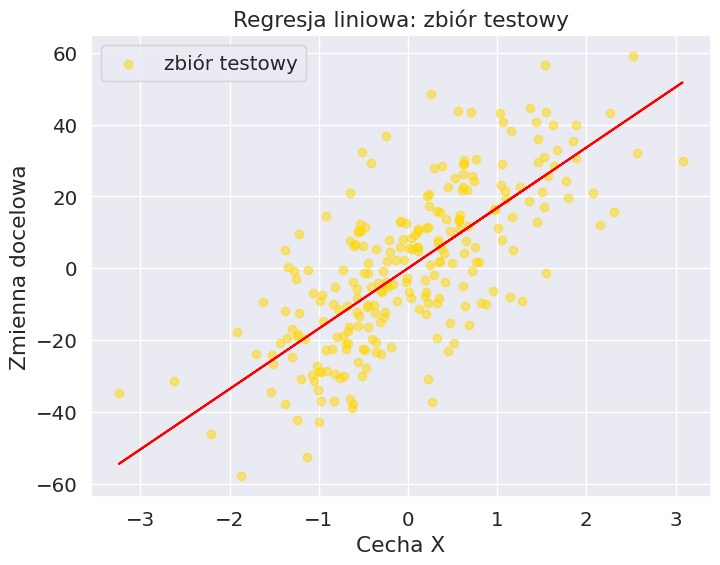

In [47]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbiór testowy')
plt.xlabel('Cecha X')
plt.ylabel('Zmienna docelowa')
plt.scatter(X_test, y_test, label="zbiór testowy", color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()


### <a name="9"></a> 10. Predykcja na podstawie modelu


Do predykcji dodajemy na danych testowych

In [50]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495


Dodanie kolumny error

In [51]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


Histogram błędu

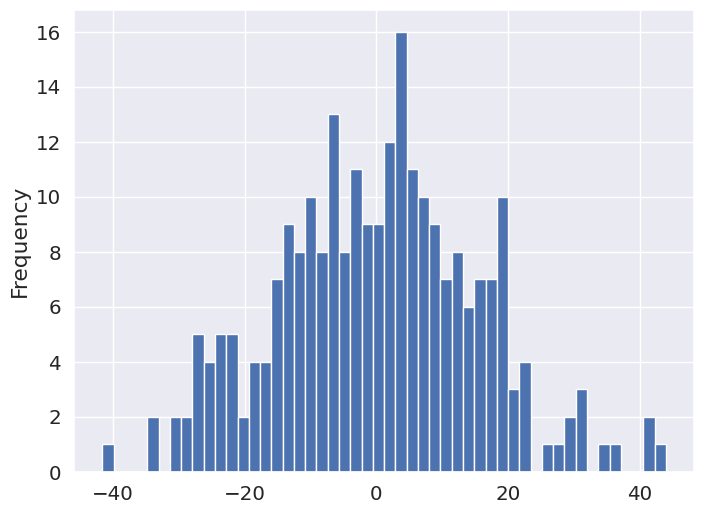

In [53]:
_ = predictions['error'].plot(kind="hist", bins=50, figsize=(8,6))